In [2]:
# Project: Ride-Hailing Demand Modeling
# Objective:
# Understand hourly ride requests and acceptance behavior
# using probability distributions and visualization.

# Random Variable 1:
# X = number of ride requests per hour
# Modeled using Poisson distribution

# Random Variable 2:
# Y = ride accepted or not
# Modeled using Bernoulli distribution

# Assumptions:
# - Requests occur independently
# - Average request rate is stable per hour
# - Acceptance probability is constant


import numpy as np
import pandas as pd
from scipy.stats import poisson, bernoulli

np.random.seed(42)

# parameters (assumptions)
lambda_requests = 40     # avg requests per hour
accept_prob = 0.7        # probability a ride is accepted
hours = 24 * 14          # 2 weeks of hourly data

# simulate ride requests
ride_requests = poisson.rvs(mu=lambda_requests, size=hours)

# simulate acceptance per request
accepted_rides = [
    bernoulli.rvs(accept_prob, size=req).sum()
    for req in ride_requests
]

# create dataset
df = pd.DataFrame({
    "hour": range(hours),
    "ride_requests": ride_requests,
    "accepted_rides": accepted_rides
})

df.head()


,hour,ride_requests,accepted_rides
0,0,38,31
1,1,44,34
2,2,33,25
3,3,42,32
4,4,47,28


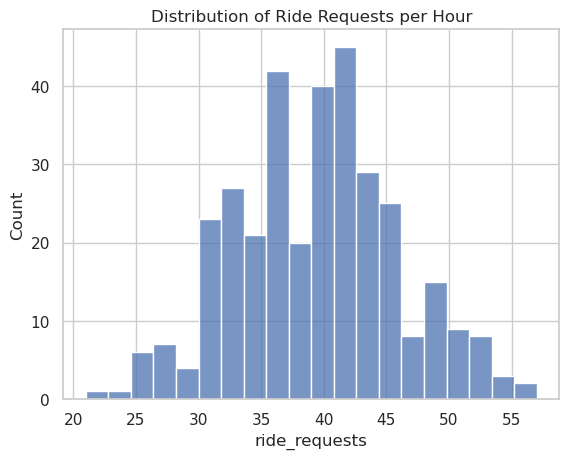

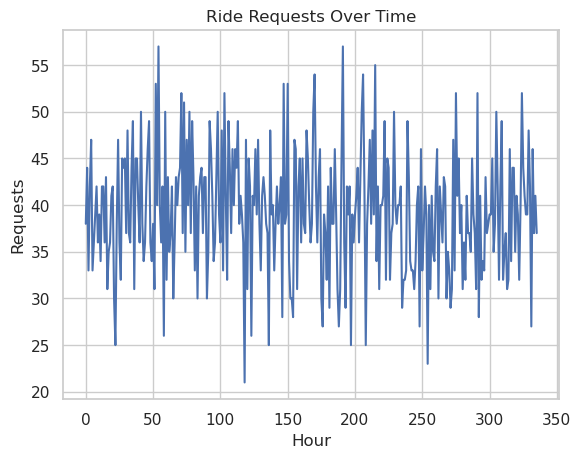

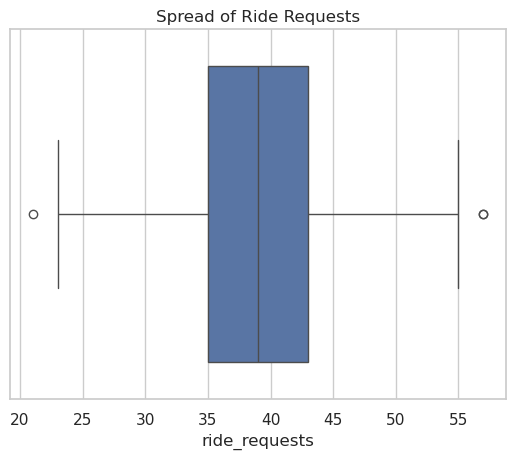

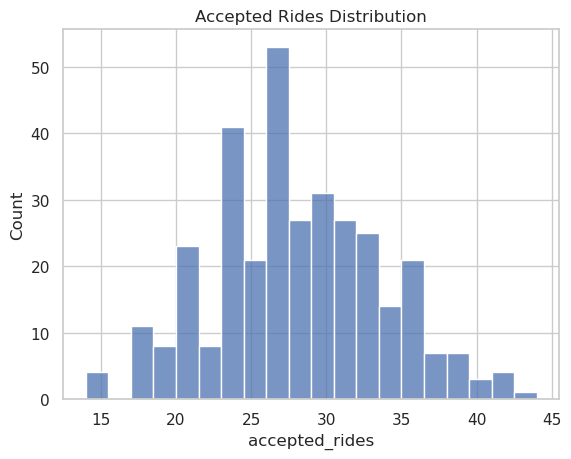

In [3]:
#this is the exploratory analysis file.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histogram: ride requests per hour
plt.figure()
sns.histplot(df["ride_requests"], bins=20)
plt.title("Distribution of Ride Requests per Hour")
plt.show()

# Line plot: demand over time
plt.figure()
plt.plot(df["hour"], df["ride_requests"])
plt.title("Ride Requests Over Time")
plt.xlabel("Hour")
plt.ylabel("Requests")
plt.show()

# Box plot
plt.figure()
sns.boxplot(x=df["ride_requests"])
plt.title("Spread of Ride Requests")
plt.show()

# Acceptance comparison
plt.figure()
sns.histplot(df["accepted_rides"], bins=20)
plt.title("Accepted Rides Distribution")
plt.show()

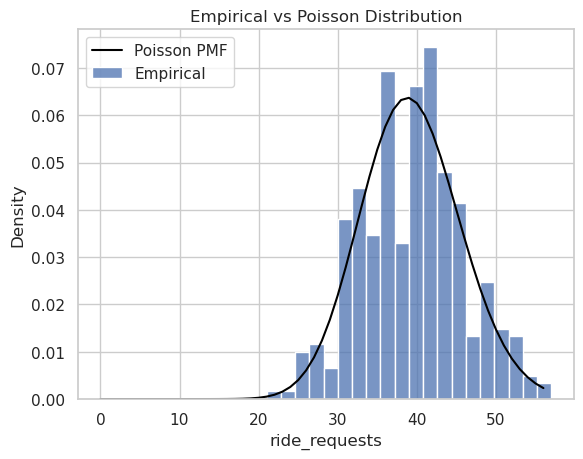

(39.291666666666664, 27.504166666666663)

In [4]:
#this is the probability modeling file
from scipy.stats import poisson
import numpy as np

# estimate lambda from data
estimated_lambda = df["ride_requests"].mean()

# theoretical PMF
x = np.arange(0, df["ride_requests"].max())
pmf = poisson.pmf(x, estimated_lambda)

# plot empirical vs theoretical
plt.figure()
sns.histplot(df["ride_requests"], bins=20, stat="density", label="Empirical")
plt.plot(x, pmf, label="Poisson PMF", color="black")
plt.legend()
plt.title("Empirical vs Poisson Distribution")
plt.show()

# expected values
expected_requests = estimated_lambda
expected_accepted = expected_requests * accept_prob

expected_requests, expected_accepted

In [1]:
#this is the file of the interactive visualization
from bokeh.plotting import figure, show
from bokeh.models import Slider
from bokeh.layouts import column
from bokeh.io import output_notebook
from scipy.stats import poisson
import numpy as np

output_notebook()

x = np.arange(0, 100)
initial_lambda = 40

y = poisson.pmf(x, initial_lambda)

p = figure(title="Ride Requests PMF (Poisson)",
           x_axis_label="Requests",
           y_axis_label="Probability")

line = p.line(x, y)

slider = Slider(start=10, end=80, value=initial_lambda,
                step=1, title="Average Requests per Hour (λ)")

def update(attr, old, new):
    lambda_val = slider.value
    y_new = poisson.pmf(x, lambda_val)
    line.data_source.data["y"] = y_new

slider.on_change("value", update)

show(column(slider, p))



Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html

